# pandas squarify example

By [Ben Welsh](mailto:ben.welsh@gmail.com)

How to use the [squarify](https://github.com/laserson/squarify) extension to [matplotlib](https://matplotlib.org/) to visualize a [pandas](https://pandas.pydata.org/) DataFrame as a [treemap](https://en.wikipedia.org/wiki/Treemapping).

This example visualizes the shape of unidentified flying objects [recorded by the National UFO Reporting Center](https://github.com/planetsig/ufo-reports).

### Import Python tools

In [1]:
import squarify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

### Import UFO data

In [4]:
point_df = pd.read_csv(
    "./input/ufo-scrubbed-geocoded-time-standardized.csv",
    names=[
        'observed',
        'city',
        'state',
        'country',
        'shape',
        'unknown',
        'duration',
        'description',
        'recorded',
        'lat',
        'lng'
    ]
)

### Group and count which UFO shapes are most common

In [5]:
shapes = point_df.groupby(["shape"]).size().reset_index()

Clean up column headers

In [6]:
shapes.columns = ['shape_name', 'total']

Sort it the data with the highest ranking shapes at the top

In [7]:
shapes = shapes.sort_values("total", ascending=False)

See the top 10

In [8]:
shapes.head(10)

,shape_name,total
19,light,16565
27,triangle,7865
4,circle,7608
14,fireball,6208
20,other,5649
28,unknown,5584
25,sphere,5387
11,disk,5213
21,oval,3733
17,formation,2457


Write out the totals

In [9]:
shapes.to_csv("./shape-counts.csv", index=False)

### Create a simple treemap using squarify

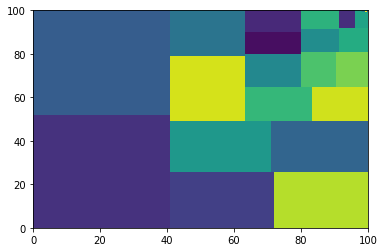

In [9]:
squarify.plot(sizes=shapes.total)

### Make it bigger

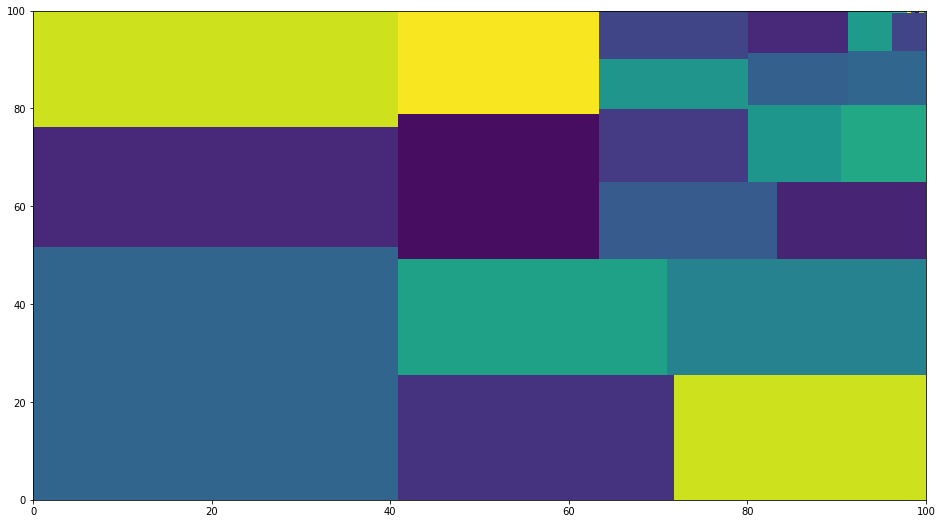

In [10]:
fig = plt.figure(figsize=(16, 9))
squarify.plot(sizes=shapes.total)

### Remove the axis

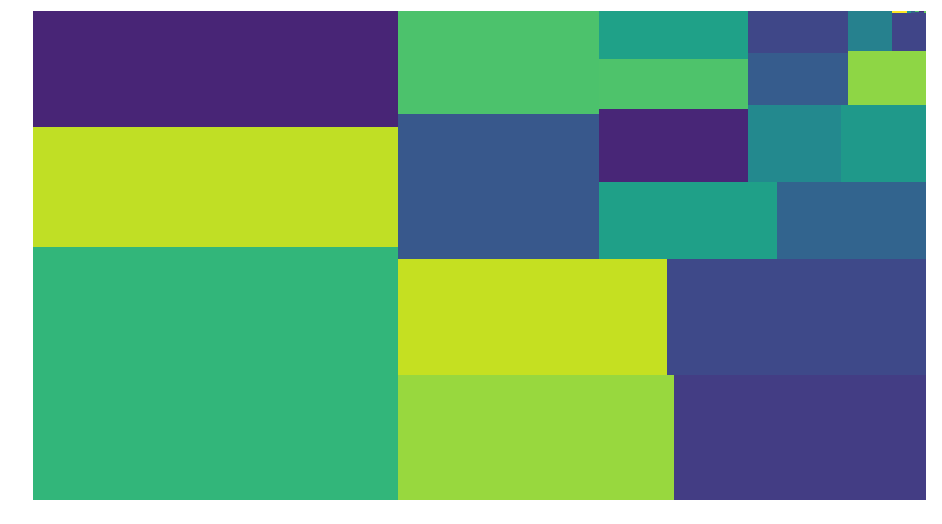

In [11]:
fig = plt.figure(figsize=(16, 9))
squarify.plot(sizes=shapes.total)
ax = plt.axis('off')

### Add labels

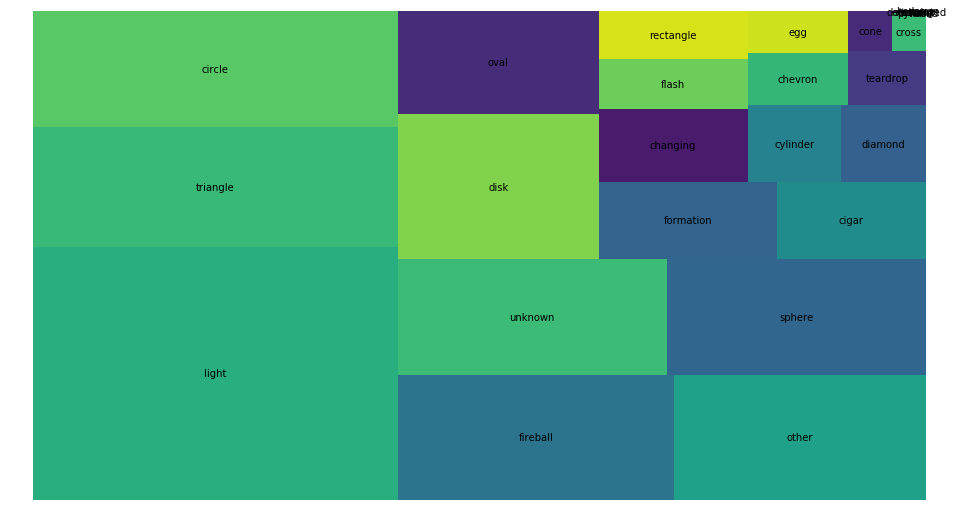

In [12]:
fig = plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=shapes.total,
    label=shapes.shape_name,
)
ax = plt.axis('off')

### Remove labels from the very small squares

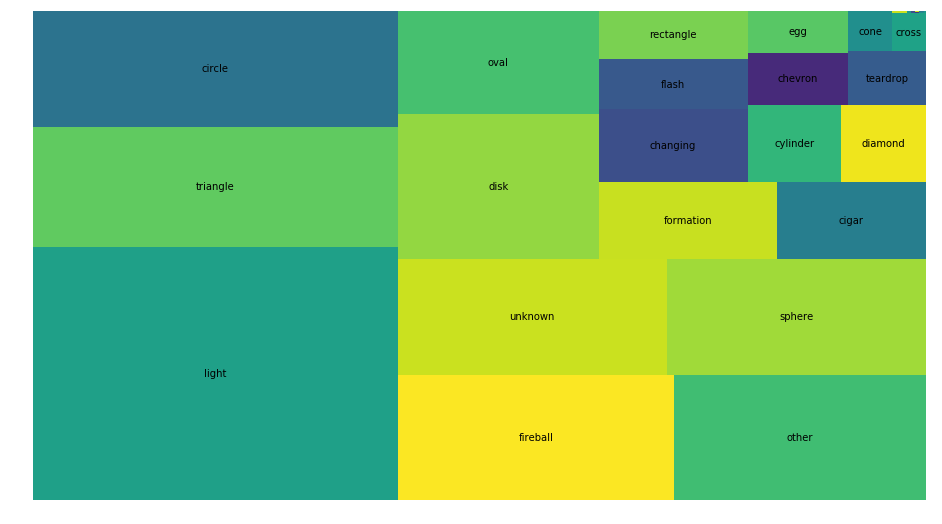

In [13]:
fig = plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=shapes.total,
    label=shapes.apply(lambda x: x.shape_name if x.total > 200 else '', axis=1),
)
ax = plt.axis('off')

### Scale the colors on a ramp

Create a matplotlib normalizer to scale the values along the data's range.

In [14]:
norm = matplotlib.colors.Normalize(vmin=shapes.total.min(), vmax=shapes.total.max())

Pass the normalized value into a color ramp and save the result in a variable

In [15]:
shapes['color'] = shapes.total.apply(lambda x: matplotlib.cm.Reds(norm(x)))

Plot.

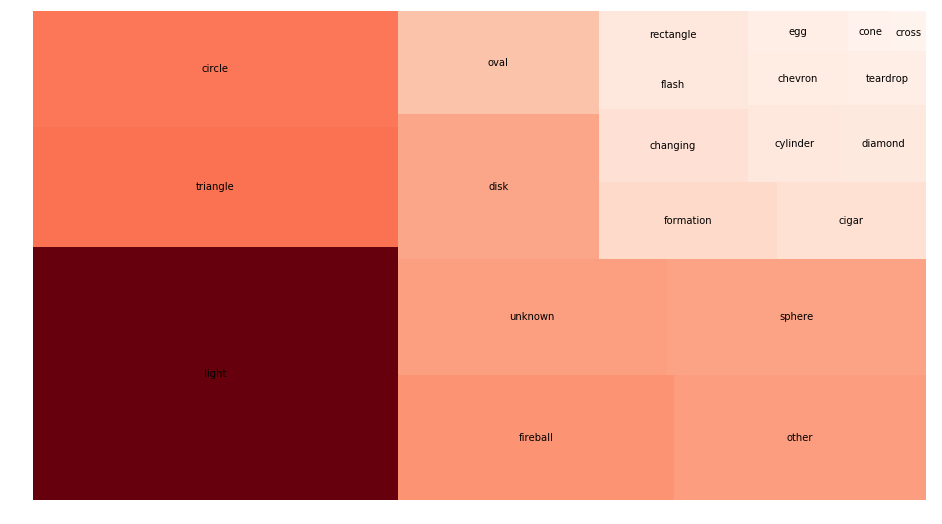

In [20]:
fig = plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=shapes.total,
    label=shapes.apply(lambda x: x.shape_name if x.total > 200 else '', axis=1),
    color=shapes.color
)
ax = plt.axis('off')

### Export it to SVG

In [21]:
fig.savefig("treemap.svg")